# Import Necessary Libraries

#### Let us import necessary libraries to get started!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

Let's start by reading in the Admission_Predict.csv file into a pandas dataframe.

In [2]:
#read_csv is a pandas function to read csv files
data = pd.read_csv('Admission_Predict.csv')

In [3]:
#head() method is used to return top n (5 by default) rows of a DataFrame or series.
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#let us drop Serial No. Column as it is not required for prediction
data.drop(["Serial No."],axis=1,inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#describe() method computes a summary of statistics like count, mean, standard deviation, min, max and quartile values.

In [5]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [7]:
#Let us rename the column Chance of Admit because it has trainling space
data=data.rename(columns = {'Chance of Admit ':'Chance of Admit'})

# Exploratory Data Analysis


## Missing Data
We can use seaborn to create a simple heatmap to see where we have missing data!

In [8]:
data.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [9]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

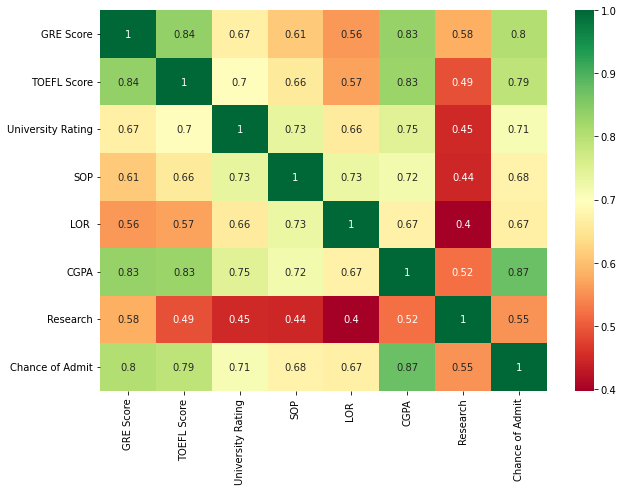

In [10]:
plt.figure(figsize=(10,7))

sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

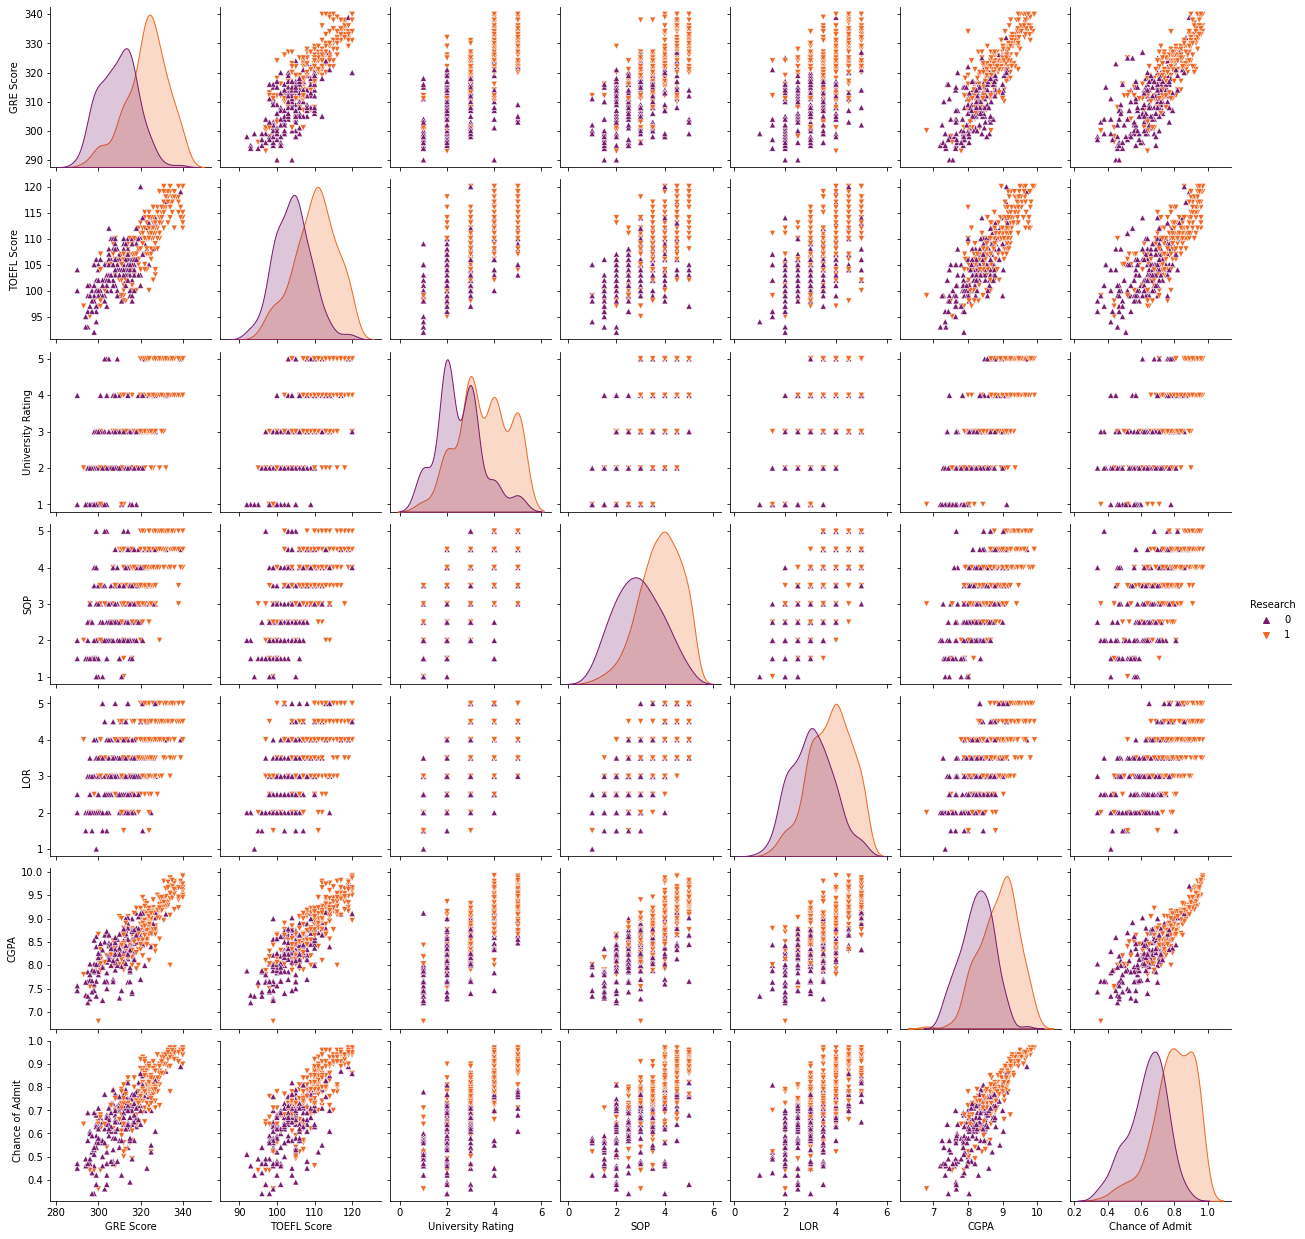

In [11]:
sns.pairplot(data=data,hue='Research',markers=["^", "v"],palette='inferno')

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

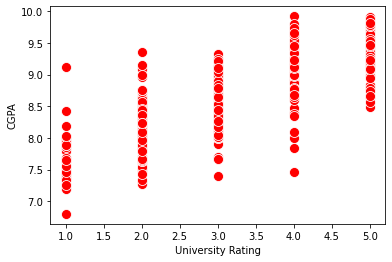

In [12]:
sns.scatterplot(x='University Rating',y='CGPA',data=data,color='Red', s=100)

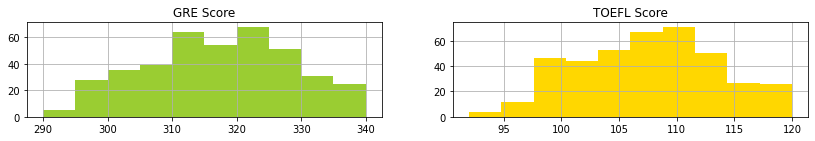

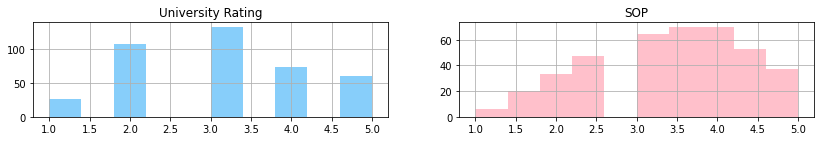

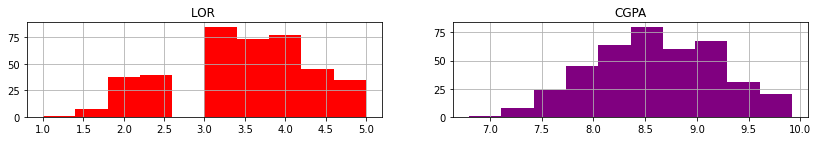

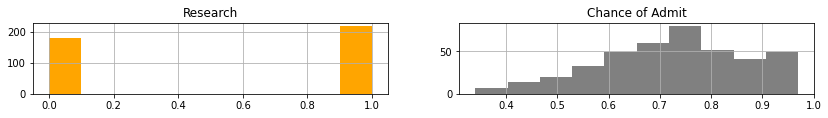

In [13]:
category = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    fig = plt.figure(figsize=(14,8))
    plt.subplot2grid((4,2),(i,0))
    data[category[2*i]].hist(color=color[2*i],bins=10)
    plt.title(category[2*i])
    plt.subplot2grid((4,2),(i,1))
    data[category[2*i+1]].hist(color=color[2*i+1],bins=10)
    plt.title(category[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

In [14]:
print('Mean CGPA Score is :',int(data['CGPA'].mean()))
print('Mean GRE Score is :',int(data['GRE Score'].mean()))
print('Mean TOEFL Score is :',int(data['TOEFL Score'].mean()))
#print('Mean University rating is :',int(data[data['University Rating']<=500].University Rating.mean()))

Mean CGPA Score is : 8
Mean GRE Score is : 316
Mean TOEFL Score is : 107


# Machine Learning 



### 1.Let's start by splitting the data into dependent and independent variable

In [8]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
x=data.iloc[:,0:-1].values
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [10]:
y=data['Chance of Admit'].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

### 2.Data Normalisation
There is huge disparity between the x values so we let us use feature scaling.
Feature scaling is a method used to normalize the range of independent variables or features of data. 



In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x=sc.fit_transform(x)
x

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 0.85714286, 0.75      , ..., 0.875     , 0.84935897,
        1.        ],
       [0.44      , 0.39285714, 0.5       , ..., 0.75      , 0.63461538,
        0.        ],
       [0.86      , 0.89285714, 0.75      , ..., 0.75      , 0.91666667,
        1.        ]])

### 3.Splitting our data into a training set and test set .

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=42)
#random_state acts as the seed for the random number generator during the split

In [13]:
import sklearn

In [16]:
from sklearn.linear_model import LinearRegression

cls =LinearRegression()

lr=cls.fit(x_train, y_train)

In [17]:
y_pred =lr.predict(x_test)
y_pred

array([0.65117446, 0.72368741, 0.93536809, 0.82164316, 0.58158673,
       0.92863016, 0.52682366, 0.54308993, 0.65940583, 0.83834924,
       0.72008833, 0.90749769, 0.55354476, 0.89008648, 0.70389539,
       0.68664473, 0.66657268, 0.48196096, 0.69057217, 0.97493132,
       0.58802433, 0.65286881, 0.71150098, 0.53528647, 0.94677007,
       0.80982947, 0.69459383, 0.56495613, 0.68192423, 0.81039878,
       0.80796481, 0.94640983, 0.64599494, 0.51104918, 0.65983663,
       0.66907811, 0.71572271, 0.64556878, 0.61540702, 0.87367833,
       0.74275261, 0.59782649, 0.77456683, 0.95944897, 0.85124125,
       0.83554825, 0.94662422, 0.64822919, 0.92247594, 0.85906183,
       0.89624998, 0.72869743, 0.78874783, 0.95142703, 0.57325803,
       0.58744723, 0.68621316, 0.84544646, 0.60495144, 0.84808919,
       0.66642894, 0.65524969, 0.70024808, 0.51206905, 0.62930376,
       0.7173701 , 0.62200838, 0.84170334, 0.85675802, 0.79886217,
       0.72196478, 0.81448203, 0.87373609, 0.83332085, 0.52554

In [18]:
from sklearn.metrics import r2_score
print("\nAccuracy score: %f" %(r2_score(y_test,y_pred) * 100))



Accuracy score: 82.120826


## Save the model to reuse it again

In [19]:
import pickle
pickle.dump(lr,open('university.pkl','wb'))
model=pickle.load(open('university.pkl','rb'))

#### Logistic Regression has a good accuracy score

# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)
y_pred_mr=mr.predict(x_test)
y_pred_mr

array([0.80426244, 0.89383501, 1.09665955, 0.98021892, 0.73499784,
       1.08837193, 0.69760779, 0.68622024, 0.91539756, 1.05413895,
       0.93489865, 1.10588193, 0.69621625, 1.0512658 , 0.82615739,
       0.87974738, 0.93515628, 0.63480712, 0.82033441, 1.17063768,
       0.79281731, 0.82998807, 0.94556435, 0.72947225, 1.17556118,
       1.02541017, 0.84452   , 0.77696804, 0.91046553, 1.01209144,
       1.01837603, 1.13077884, 0.84624738, 0.66187   , 0.92714854,
       0.88349038, 0.988147  , 0.84069227, 0.85328412, 1.15663137,
       0.92572607, 0.74932866, 0.96031522, 1.1388663 , 0.98221545,
       1.0041417 , 1.16181567, 0.90061114, 1.09568855, 1.05824421,
       1.06477037, 0.89402156, 0.88298921, 1.13735636, 0.77510826,
       0.79997202, 0.9765931 , 1.04524936, 0.77327456, 0.98498726,
       0.83482812, 0.82434563, 0.88863941, 0.61352777, 0.86973341,
       0.87084106, 0.80597283, 1.0915513 , 1.0319856 , 0.95754644,
       0.88298555, 1.06175774, 0.988511  , 0.94300354, 0.71801

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mr)

0.2585171665136329

In [33]:
#import library for random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=0)
#n_estimators no of decision trees
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [34]:
y_pred=rf.predict(x_test)
y_pred[0:5]

array([0.988, 0.997, 1.   , 1.   , 0.795])

In [35]:
y_test[0:5]

array([ True,  True,  True,  True, False])

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4154499428571429

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=25,p=1)
#n_estimators no of decision trees
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=25, p=1)

In [38]:
y_pred=rf.predict(x_test)
y_pred[0:5]

array([0.988, 0.997, 1.   , 1.   , 0.795])

In [39]:
y_test[0:5]

array([ True,  True,  True,  True, False])

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4154499428571429

# svm

In [41]:
from sklearn.svm import SVR
svr=SVR()
#n_estimators no of decision trees
svr.fit(x_train,y_train)

SVR()

In [42]:
y_pred=rf.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4154499428571429

In [43]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(x_train, y_train)
predictions=clf.predict(x_test)
predictions=clf.predict(x_test)
from sklearn.metrics import r2_score
R2=r2_score(y_test,predictions)

print(f'R-square= {round(R2*100,2)}% ')

R-square= 32.13% 


In [44]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(x_train, y_train)
predictions=clf.predict(x_test)
predictions=clf.predict(x_test)
from sklearn.metrics import r2_score
R2=r2_score(y_test,predictions)

print(f'R-square= {round(R2*100,2)}% ')

R-square= 32.13% 


In [45]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
y_pred = reg_rf.predict(x_test)

In [46]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.11325
MSE: 0.065225
RMSE: 0.25539185578244267


In [47]:
metrics.r2_score(y_test, y_pred)

0.4036571428571428